In [2]:
# 데이터 분석 관련 라이브러리
import pandas as pd  # 데이터 프레임 처리
import numpy as np  # 배열, 행렬 연산

# 시각화 관련 라이브러리
import matplotlib.pyplot as plt  # 기본적인 시각화
import seaborn as sns  # 고급 시각화
import matplotlib.font_manager as fm  # 폰트 설정
from matplotlib import rcParams  # 설정 관리

# 맥북에서 한글 설정 (matplotlib에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 기본 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 머신러닝 관련 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 스케일러
from sklearn.linear_model import LinearRegression, LogisticRegression  # 선형 회귀, 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # 결정 트리
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # 랜덤 포레스트
from sklearn.svm import SVC, SVR  # 서포트 벡터 머신
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report  # 성능 평가

# 통계 관련 라이브러리
import statsmodels.api as sm  # 통계 모델링
import scipy.stats as stats  # 통계 함수

# 기타 라이브러리
import os  # 운영체제 관련 기능
import sys  # 시스템 관련 기능
import re  # 정규 표현식
import json  # JSON 파일 처리
import datetime  # 날짜 및 시간 처리
import pickle  # 객체 직렬화 및 역직렬화
import requests  # HTTP 요청
import random  # 난수 생성
import math  # 수학 함수
import time  # 시간 관련 함수

In [3]:
옥길동_매물 = pd.read_csv('/Users/parkjunhyeok/콤파스_지식산업센터_공모전/크롤링데이터전처리/소사구/옥길동_매물.csv')
옥길동_매물.head()

,이름,가격,면적 및 층수,센터명칭
0,지식산업센터,500/40,"73/36m², 7/10층",더플랫폼R
1,지식산업센터,"2,000/150","184/92m², 2/10층",더플랫폼R
2,지식산업센터,500/40,"81/41m², 4/10층",더플랫폼R
3,지식산업센터,"1,200/120","216/108m², 7/10층",광양프런티어밸리 5차 지식산업센터
4,지식산업센터,200/25,"40/22m², B2/10층",더플랫폼R


In [4]:
# 공급면적, 전용면적, 현재층, 총층을 추출하는 함수
def extract_areas_and_floors(area_str):
    area_str = area_str.split(', ')
    supply_area, exclusive_area = area_str[0].split('/')
    current_floor, total_floors = area_str[1].split('/')
    return supply_area, exclusive_area, current_floor, total_floors

# 가격에서 보증금과 월세를 추출하는 함수
def extract_deposit_and_rent(price_str):
    if '억' in price_str:  # 매매인 경우
        return price_str, None  # 매매가로 설정, 월세는 없음
    else:
        parts = price_str.split('/')
        if len(parts) == 2:
            return parts[0], parts[1]  # 보증금과 월세
        else:
            return price_str, None  # 월세가 없는 경우

# 공급면적, 전용면적, 현재층, 총층 컬럼 추가
옥길동_매물[['공급면적', '전용면적', '현재층', '총층']] = 옥길동_매물['면적 및 층수'].apply(lambda x: pd.Series(extract_areas_and_floors(x)))

# 공급종류, 보증금, 월세 컬럼 추가
옥길동_매물['공급종류'] = 옥길동_매물['가격'].apply(lambda x: '매매' if '억' in x else '월세')
옥길동_매물[['보증금', '월세']] = 옥길동_매물['가격'].apply(lambda x: pd.Series(extract_deposit_and_rent(x)))

# 매매인 경우 보증금과 월세를 NaN으로 설정하고, 매매가 컬럼을 추가
옥길동_매물['보증금'] = 옥길동_매물.apply(lambda row: np.nan if row['공급종류'] == '매매' else row['보증금'], axis=1)
옥길동_매물['월세'] = 옥길동_매물.apply(lambda row: np.nan if row['공급종류'] == '매매' else row['월세'], axis=1)

# 매매가 컬럼 추가
옥길동_매물['매매가'] = 옥길동_매물.apply(lambda row: row['가격'] if row['공급종류'] == '매매' else np.nan, axis=1)


In [5]:
옥길동_매물

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가
0,지식산업센터,500/40,"73/36m², 7/10층",더플랫폼R,73,36m²,7,10층,월세,500,40,NaN
1,지식산업센터,"2,000/150","184/92m², 2/10층",더플랫폼R,184,92m²,2,10층,월세,"2,000",150,NaN
2,지식산업센터,500/40,"81/41m², 4/10층",더플랫폼R,81,41m²,4,10층,월세,500,40,NaN
3,지식산업센터,"1,200/120","216/108m², 7/10층",광양프런티어밸리 5차 지식산업센터,216,108m²,7,10층,월세,"1,200",120,NaN
4,지식산업센터,200/25,"40/22m², B2/10층",더플랫폼R,40,22m²,B2,10층,월세,200,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
435,지식산업센터,500/45,"75/37m², 9/10층",우성테크노파크Ⅰ,75,37m²,9,10층,월세,500,45,NaN
436,지식산업센터,600/60,"86/43m², 3/10층",더플랫폼R,86,43m²,3,10층,월세,600,60,NaN
437,지식산업센터,500/50,"80/40m², 3/10층",더플랫폼R,80,40m²,3,10층,월세,500,50,NaN
438,지식산업센터,500/45,"84/42m², 5/10층",부천옥길 서영아너시티2,84,42m²,5,10층,월세,500,45,NaN


In [6]:
옥길동_매물['전용면적'] = 옥길동_매물['전용면적'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
# '총층'에서 지하층(B1, B2 등)을 포함하여 숫자만 남기고 나머지 문자열 제거
옥길동_매물['총층'] = 옥길동_매물['총층'].apply(lambda x: ''.join(filter(str.isdigit, str(x))) if 'B' not in str(x) else str(x))


In [7]:
옥길동_매물['전용면적'] = 옥길동_매물['전용면적'].str.replace('²', '', regex=False)

In [8]:
옥길동_매물

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가
0,지식산업센터,500/40,"73/36m², 7/10층",더플랫폼R,73,36,7,10,월세,500,40,NaN
1,지식산업센터,"2,000/150","184/92m², 2/10층",더플랫폼R,184,92,2,10,월세,"2,000",150,NaN
2,지식산업센터,500/40,"81/41m², 4/10층",더플랫폼R,81,41,4,10,월세,500,40,NaN
3,지식산업센터,"1,200/120","216/108m², 7/10층",광양프런티어밸리 5차 지식산업센터,216,108,7,10,월세,"1,200",120,NaN
4,지식산업센터,200/25,"40/22m², B2/10층",더플랫폼R,40,22,B2,10,월세,200,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
435,지식산업센터,500/45,"75/37m², 9/10층",우성테크노파크Ⅰ,75,37,9,10,월세,500,45,NaN
436,지식산업센터,600/60,"86/43m², 3/10층",더플랫폼R,86,43,3,10,월세,600,60,NaN
437,지식산업센터,500/50,"80/40m², 3/10층",더플랫폼R,80,40,3,10,월세,500,50,NaN
438,지식산업센터,500/45,"84/42m², 5/10층",부천옥길 서영아너시티2,84,42,5,10,월세,500,45,NaN


### 폴더파일을 읽고 전처리

In [9]:
import os
import pandas as pd

# 파일이 있는 폴더와 저장할 폴더 경로 설정
input_folder = '/Users/parkjunhyeok/콤파스_지식산업센터_공모전/크롤링데이터전처리/원미구'
output_folder = '/Users/parkjunhyeok/콤파스_지식산업센터_공모전/크롤링데이터전처리/원미구_전처리'

# 저장할 폴더가 없으면 생성
os.makedirs(output_folder, exist_ok=True)

# 폴더 내 모든 csv 파일을 읽고 전처리한 후 저장하는 코드
for file_name in os.listdir(input_folder):
    if file_name.endswith('.csv'):
        # CSV 파일 읽기
        file_path = os.path.join(input_folder, file_name)
        df = pd.read_csv(file_path)
        
        # 공급면적, 전용면적, 현재층, 총층을 추출하는 함수
        def extract_areas_and_floors(area_str):
            area_str = area_str.split(', ')
            supply_area, exclusive_area = area_str[0].split('/')
            current_floor, total_floors = area_str[1].split('/')
            return supply_area, exclusive_area, current_floor, total_floors

        # 가격에서 보증금과 월세를 추출하는 함수
        def extract_deposit_and_rent(price_str):
            if '억' in price_str:  # 매매인 경우
                return price_str, None  # 매매가로 설정, 월세는 없음
            else:
                parts = price_str.split('/')
                if len(parts) == 2:
                    return parts[0], parts[1]  # 보증금과 월세
                else:
                    return price_str, None  # 월세가 없는 경우

        # 공급면적, 전용면적, 현재층, 총층 컬럼 추가
        df[['공급면적', '전용면적', '현재층', '총층']] = df['면적 및 층수'].apply(lambda x: pd.Series(extract_areas_and_floors(x)))

        # 공급종류, 보증금, 월세 컬럼 추가
        df['공급종류'] = df['가격'].apply(lambda x: '매매' if '억' in x else '월세')
        df[['보증금', '월세']] = df['가격'].apply(lambda x: pd.Series(extract_deposit_and_rent(x)))

        # 매매인 경우 보증금과 월세를 NaN으로 설정하고, 매매가 컬럼을 추가
        df['보증금'] = df.apply(lambda row: np.nan if row['공급종류'] == '매매' else row['보증금'], axis=1)
        df['월세'] = df.apply(lambda row: np.nan if row['공급종류'] == '매매' else row['월세'], axis=1)

        # 매매가 컬럼 추가
        df['매매가'] = df.apply(lambda row: row['가격'] if row['공급종류'] == '매매' else np.nan, axis=1)
        
        # '전용면적'에서 숫자만 남기고 제곱기호(²) 제거
        df['전용면적'] = df['전용면적'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
        df['전용면적'] = df['전용면적'].str.replace('²', '', regex=False)
        
        # '총층'에서 지하층(B1, B2 등)을 포함하여 숫자만 남기고 나머지 문자열 제거
        df['총층'] = df['총층'].apply(lambda x: ''.join(filter(str.isdigit, str(x))) if 'B' not in str(x) else str(x))
        
        # 전처리된 데이터 CSV로 저장
        output_file_path = os.path.join(output_folder, file_name)
        df.to_csv(output_file_path, index=False)

output_folder


'/Users/parkjunhyeok/콤파스_지식산업센터_공모전/크롤링데이터전처리/원미구_전처리'

### concat하는 구문

In [10]:
# 전처리된 전체 파일이 있는 폴더 경로 설정
processed_folder = '/Users/parkjunhyeok/콤파스_지식산업센터_공모전/크롤링데이터전처리/전처리된전체파일'

# 폴더 내 모든 CSV 파일을 읽고 하나의 DataFrame으로 합치기
all_files = [file for file in os.listdir(processed_folder) if file.endswith('.csv')]

# 각 파일을 읽어와서 하나의 리스트로 저장
dfs = []
for file_name in all_files:
    file_path = os.path.join(processed_folder, file_name)
    df = pd.read_csv(file_path)
    dfs.append(df)

# 리스트에 저장된 DataFrame을 하나로 합치기
merged_df = pd.concat(dfs, ignore_index=True)

merged_df


,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가
0,지식산업센터,500/40,"73/36m², 7/10층",더플랫폼R,73,36,7,10,월세,500,40.0,NaN
1,지식산업센터,"2,000/150","184/92m², 2/10층",더플랫폼R,184,92,2,10,월세,"2,000",150.0,NaN
2,지식산업센터,500/40,"81/41m², 4/10층",더플랫폼R,81,41,4,10,월세,500,40.0,NaN
3,지식산업센터,"1,200/120","216/108m², 7/10층",광양프런티어밸리 5차 지식산업센터,216,108,7,10,월세,"1,200",120.0,NaN
4,지식산업센터,200/25,"40/22m², B2/10층",더플랫폼R,40,22,B2,10,월세,200,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
742,지식산업센터,"2,714/226","359/201m², 4/7층",정보없음,359,201,4,7,월세,"2,714",226.0,NaN
743,지식산업센터,"2,000/120","207/107m², 2/7층",정보없음,207,107,2,7,월세,"2,000",120.0,NaN
744,지식산업센터,"2,700/226","359/187m², 4/7층",정보없음,359,187,4,7,월세,"2,700",226.0,NaN
745,지식산업센터,"1,440/120","139/72m², 7/7층",정보없음,139,72,7,7,월세,"1,440",120.0,NaN


### 지산데이터불러오자

In [ ]:
부천시_지산데이터 = pd.read_csv('/Users/parkjunhyeok/콤파스_지식산업센터_공모전/부천시상권정보전처리/부천시지산.csv')
부천시_지산데이터

- merge_df를 보면 하나의 센터안에 여러개의 매물이 존재한다. 
- 이제 어떻게 전처리해서 원하는것을 보면 좋을까?

1. 월세인경우 평수를 구하여 평당 월 임대료를 구하자


In [12]:
부천시_지산_매물데이터 = merged_df.copy()

In [24]:
부천시_지산_매물데이터.to_csv('./부천시_부동산_매물데이터_전처리.csv', index=False)

In [13]:
부천시_지산_매물데이터['공급종류'].value_counts()

공급종류
월세    520
매매    227
Name: count, dtype: int64

In [14]:
부천시_지산_매물데이터['센터명칭'] = 부천시_지산_매물데이터['센터명칭'].str.replace(' ', '')

In [15]:
부천시_지산_매물데이터['센터명칭'].value_counts()

센터명칭
정보없음                166
광양프런티어밸리5차지식산업센터    131
더플랫폼R               127
우성테크노파크Ⅰ             55
신중동더퍼스트지식산업센터        47
부천테크노밸리U1center      41
골든IT타워               37
부천옥길서영아너시티2          35
광양프런티어밸리7차지식산업센터     30
부천테크노파크              26
옥길지식산업센터             25
인철테크노밸리              11
y-제니스파크               8
부천테크노월드               3
원일테크노                 2
진택하이테크밸리              1
고산테크노밸리               1
다온테크노밸리               1
Name: count, dtype: int64

부천시_지산데이터.head()

In [16]:
부천시_지산데이터['지식산업센터명칭'] = 부천시_지산데이터['지식산업센터명칭'].str.replace(' ', '')

In [17]:
부천시_지산데이터['지식산업센터명칭'].value_counts()

지식산업센터명칭
(주)두성기계연구           1
BK테크노밸리             1
서림테크노파크3차           1
서림테크노파크II           1
서림테크노파크Ⅰ            1
서영아너시티2             1
송내테크노밸리             1
송림벨리타운              1
신중동더퍼스트지식산업센터       1
신한테크노벨리             1
옥길테크노벨리             1
와이제니스파크             1
우성테크노파크             1
우정테크노벨리             1
원일테크노               1
원일테크노Ⅱ              1
웹툰융합센터              1
은성테크노               1
은하테크노               1
인철테크노밸리             1
인철테크노밸리2차           1
진택하이테크밸리            1
춘의디아크원              1
춘의테크노파크             1
춘의테크노파크3차           1
삼보테크노타워             1
비즈타워                1
부천테크노파크제4단지         1
대우테크노타운             1
고산테크노벨리             1
골든IT타워              1
광양프런티어밸리7차          1
광양프런티어밸리5차지식산업센터    1
구심이엔지               1
남성산업㈜               1
뉴테크노타운              1
다온테크노벨리             1
다우테크노타운             1
다우테크노타운Ⅱ            1
대우테크노파크             1
부천테크노파크제3단지         1
대원빌딩                1
덕성빌딩                1
디클래스I               1
레노부르크               1
부

In [ ]:
'골든IT타워','부천테크노'

In [28]:
# 월세 평균
부천시_지산_매물데이터['월세'].describe()

count    514.000000
mean     103.928016
std      104.299112
min       20.000000
25%       45.000000
50%       60.000000
75%      130.000000
max      705.000000
Name: 월세, dtype: float64

In [18]:
# 부천시_지산_매물데이터
# 부천시_지산데이터
# 머지(센터명 , 지식산업센터명칭)

# 부천시_지산_매물데이터와 부천시_지산데이터를 '센터명칭'과 '지식산업센터명칭' 컬럼을 기준으로 머지
merged_data = pd.merge(부천시_지산_매물데이터, 부천시_지산데이터, left_on='센터명칭', right_on='지식산업센터명칭', how='inner')


In [20]:
merged_data['센터명칭'].value_counts()

센터명칭
광양프런티어밸리5차지식산업센터    131
신중동더퍼스트지식산업센터        47
골든IT타워               37
인철테크노밸리              11
부천테크노월드               3
원일테크노                 2
진택하이테크밸리              1
Name: count, dtype: int64

In [23]:
numeric_data

,공급면적,전용면적,총층,월세,위도,경도,부지면적(㎡),건축면적(㎡),공장시설면적(㎡),기타산업시설면적(㎡),지원시설면적(㎡),공동시설면적(㎡),유치가능업체수,입주업체수,공장동수,공실률
0,216,108,10,120.0,37.466348,126.827821,10455.7,72817.36,31417.02,NaN,5004.31,NaN,516.0,516.0,1.0,0.0
1,80,39,10,43.0,37.466900,126.826617,5588.2,36843.89,26237.43,NaN,10606.46,NaN,531.0,531.0,1.0,0.0
2,200,100,10,70.0,37.466348,126.827821,10455.7,72817.36,31417.02,NaN,5004.31,NaN,516.0,516.0,1.0,0.0
3,216,108,10,120.0,37.466348,126.827821,10455.7,72817.36,31417.02,NaN,5004.31,NaN,516.0,516.0,1.0,0.0
4,127,62,10,77.0,37.466900,126.826617,5588.2,36843.89,26237.43,NaN,10606.46,NaN,531.0,531.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,433,304,7,368.0,37.526573,126.769540,2780.0,11894.95,8992.14,NaN,2901.80,NaN,30.0,30.0,1.0,0.0
228,814,572,7,692.0,37.526573,126.769540,2780.0,11894.95,8992.14,NaN,2901.80,NaN,30.0,30.0,1.0,0.0
229,818,575,7,705.0,37.526573,126.769540,2780.0,11894.95,8992.14,NaN,2901.80,NaN,30.0,30.0,1.0,0.0
230,736,517,7,440.0,37.528476,126.775689,1043.3,4414.33,3002.50,NaN,1411.83,NaN,10.0,10.0,1.0,0.0


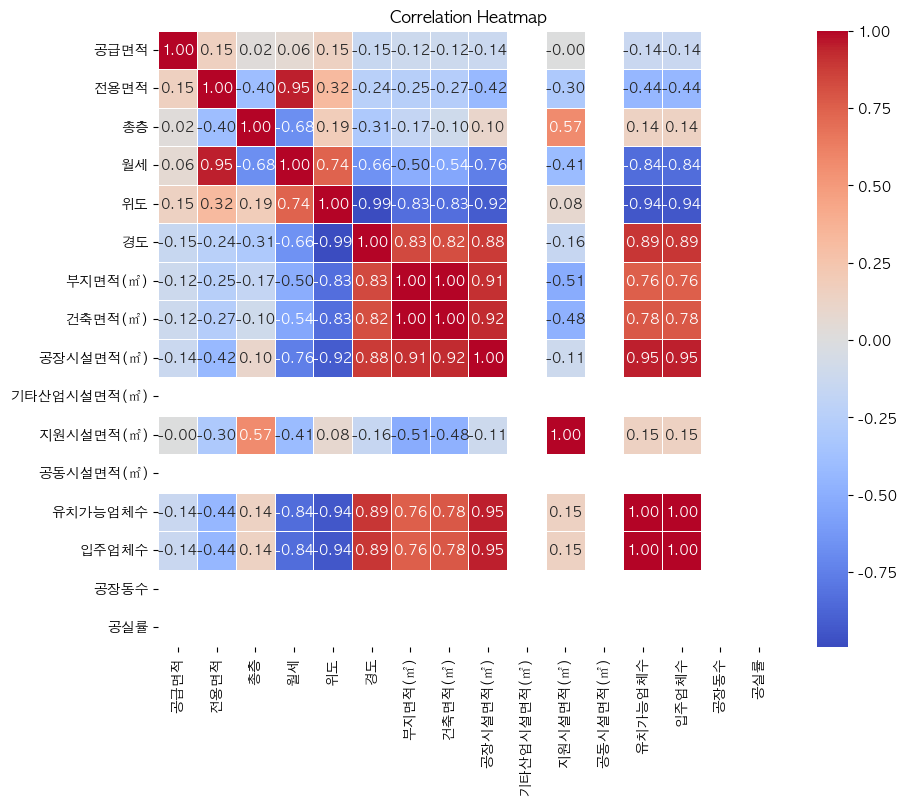

In [22]:
# 상관계수 계산
# 수치형 데이터만 선택
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
corr = numeric_data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()